## Notação matemática usada na prática

Adotamos o padrão matemático para definir as variáveis a seguir. Nesse padrão, todas as variáveis que representam matrizes estão em maiúsculas, vetores em negrito e minúscula e, valores numéricos, como variáveis minusculas. Logo após, mapeamos cada variável matemática com uma respectiva variável em Python.

- $m$: quantidade de instancias
- $f$: quantidade de atributos
- $X$: Matriz de instâncias representadas pelo seus atributos dimensão $(m,f)$
- $\pmb{y}$: Vetor de tamanho $m$ representando a classe real de cada instância
- $\pmb{\hat{y}}$: Vetor de predições que, para cada instancia, possui o valor predito para ela. Caso seja uma classificação binária, este valor será 0 ou 1
- $\pmb{w}$: vetor de pesos para ponderar os atributos (também chamado de parâmetros), tamanho $f$
- $w_j$: $j$-ésimo valor do vetor $\pmb{w}$ que pondera $j$-ésimo atributo da matriz $X$
- $b$: Valor de viés da regressão logística (do inglês, bias term)
- $\pmb{z}$: vetor de tamanho $m$ representado o resultado da função z, para cada instancia $m$.
- $z_i$: Representa o resultado da função z para a instancia $i$.
- $\pmb{a}$: Vetor de ativações de tamanho $m$ calculada por meio do vetor $z$
- $a_i$: Valor de ativação da instancia $i$
- $\pmb{z^d}$: Derivada $\frac{\partial J}{\partial z_i}$ para cada instância $i$ do modelo. Possui o mesmo tamanho que  $\pmb{z}$
- $\pmb{w^d}$ Derivada $\frac{\partial J}{\partial w_j}$ para cada peso $j$ do modelo, possui o mesmo tamanho de $\pmb{w}$
- $b^d$ Derivada $\frac{\partial J}{\partial b}$

## Implementação das classes FuncaoAtivacao e RegressaoLogistica

**Atividade 1: Função de ativação**: Iniciamente, você deverá criar a função de ativação e a derivada $\frac{\partial J}{\partial w_j}$ quando se usa essa função. Para isso, você deverá criar uma instancia da classe `FuncaoAtivação` representando a função sigmoid. Para criar esse objeto, você deverá passar dois parametros: sua função de ativação, representada pelo parâmetro `funcao`, e a função que calcula o vetor gradiente $\pmb{z^d}$, representada pelo parâmetro `dz_funcao`. Essa derivada é passada na função de ativação pois será diferente dependendo de qual função de ativação será usada.

O atributo `funcao`, irá esperar um parametro  `z`, representando o vetor $\pmb{z}$ e, o atributo `dz_funcao`, irá esperar como parametro `a`, `z` e `y` representando os vetores $\pmb{a}$, $\pmb{z}$ e $\pmb{y}$. Os pâmetros `a`, `z` e `y` podem ser listas ou números reais, por isso use a biblioteca numpy para fazer as operações matemáticas ao invés das funções do pacote `math` durante toda a prática (ex. [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html), [np.log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)). Essa biblioteca trabalha com listas e vetores da mesma forma além de usar vetorização.


<!--
A palavra **função** está sendo usada em dois contextos aqui: você criará três **instancias da classe** FuncaoAtivacao, cada uma, passando como parametro uma função (e sua derivada). Por exemplo, **uma das instancias da da classe FuncaoAtivação** será a sigmoid em que se criará **um objeto de nome "sigmoid"** com dois parametros: (1) a **função de transformação sigmoid** e, outro, **a função do cálculo** da derivada $\frac{\partial J}{\partial w_j}$ baseada na função de tranformação sigmoid.
-->

Para implementar as funções e passá-las como parâmetro, você pode criar uma função anônima por meio da [função lambda](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions).  Veja abaixo um exemplo de usar funções como parametros.

In [20]:
#criação de uma funcao de soma
soma = lambda x,y:x+y
result = soma(3,4)
print(result)

#Exemplo mais bonitinho :)
#Cada função retorna o oi em um determinado idioma
#a função lambda recebe como parametro o nome da pessoa
#e retorna uma string com a forma de dar oi nesse idioma
oi_pt = lambda str_pessoa:f"Oi {str_pessoa}! Como vai?"
oi_en = lambda str_pessoa:f"Hi {str_pessoa}! How are you?"

def da_oi_para(funcao_de_dar_oi,str_pessoa):
    print("..... Minha linda interface de dar oi ------")
    str_oi = funcao_de_dar_oi(str_pessoa)
    print(str_oi)
    print(".....")

#essa funcao é passada como parametro na funcao da_oi_para
da_oi_para(oi_en,"Alice")
da_oi_para(oi_pt,"Alice")




7
..... Minha linda interface de dar oi ------
Hi Alice! How are you?
.....
..... Minha linda interface de dar oi ------
Oi Alice! Como vai?
.....


Faça o teste abaixo da função sigmoide e da sua derivada:

In [21]:
!python3 -m regressao_logistica_test TestFuncaoAtivacao.test_sigmoid

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/victor/Downloads/Prática Regressão Logistica/regressao_logistica_test.py", line 1, in <module>
    from regressao_logistica import *
  File "/home/victor/Downloads/Prática Regressão Logistica/regressao_logistica.py", line 130
    for i in range(self.num_iteracoes):
IndentationError: unexpected indent


In [19]:
!python3 -m regressao_logistica_test TestFuncaoAtivacao.test_sigmoid_dz

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/victor/Downloads/Prática Regressão Logistica/regressao_logistica_test.py", line 1, in <module>
    from regressao_logistica import *
  File "/home/victor/Downloads/Prática Regressão Logistica/regressao_logistica.py", line 130
    for i in range(self.num_iteracoes):
IndentationError: unexpected indent


**Atividade 2 - implementação do método `z` da classe `RegressaoLogistica`**: Essa classe possui os seguintes atributos:

- `arr_w`: vetor de pesos $\pmb{w}$
- `b`: Valor de viés da regressão logística
- `func_ativacao`: função de ativação a ser usada. Esse atributo é uma função Python
- `dz_func`: função derivada a ser usada de acordo com a função de ativação. Esse atributo também é uma função Python
- `int_max_it`: Número de iterações (épocas) a rodar a regressão logística
- `mat_x`: Matriz $X$ de atributos por instâncias
- `arr_y`: Vetor de classes reais $\pmb{y}$
- `arr_z`: vetor de resultados $\pmb{z}$
- `arr_a`: vetor de ativações $\pmb{a}$
- `gradiente`: Instancia da classe `Gradiente` que possui os atributos `arr_dz`, `arr_dw` e `db` representando, respectivamente, $\pmb{z^d}$, $\pmb{w^d}$ e $b^d$.

Você deverá, por meio do vetor de pesos `arr_w`, valor `b` (ambos atributos da classe) e a matriz de atributos `mat_x` (passado como parâmetro) implementar o método `z` que retornará o vetor de resultados $\pmb{z}$. Use o [método dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.dot.html) e o [atributo T](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.T.html) dos arranjos numpy.

In [16]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_z

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/victor/Downloads/Prática Regressão Logistica/regressao_logistica_test.py", line 1, in <module>
    from regressao_logistica import *
  File "/home/victor/Downloads/Prática Regressão Logistica/regressao_logistica.py", line 130
    for i in range(self.num_iteracoes):
IndentationError: unexpected indent


**Atividade 3 - Forward propagation:** Implemente o método  `forward_propagation`. Nele, você irá usar a matriz $X$, representada por `mat_x`, o vetor de pesos $\pmb{w}$, representado pelo atributo `arr_w` para calcular os vetores $\pmb{z}$ e $\pmb{a}$ por meio do método `z` e da função de ativação, armazenada no atributo `func_ativacao`. Verifique nesse método se o `arr_w` está definido, caso não esteja, você deverá inicializá-lo com zero em todas as posições (use a função [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)). Veja o tamanho de w para isso

In [ ]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_forward_propagation

(3, 4)
MAT_X: [[0.2 0.1 0.3 0.5]
 [0.1 0.5 0.1 0.1]
 [0.9 0.1 0.4 0.7]]
arr_w: [0.5 0.2 0.9 0.3]
b: 0.2
ARR_Z: [0.74 0.47 1.24]
ARR_A: [0.67699586 0.61538376 0.77556401]
.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


**Atividade 4 - Backward propagation**: Você deverá implementar a função que calcula os gradientes conforme especificado no método

In [ ]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_backward_propagation

(3, 4)
MAT_X: [[0.2 0.1 0.3 0.5]
 [0.1 0.5 0.1 0.1]
 [0.9 0.1 0.4 0.7]]
arr_w: [0.5 0.2 0.9 0.3]
b: 0.2
ARR_Z: [0.74 0.47 1.24]
ARR_A: [0.67699586 0.61538376 0.77556401]
DZ(0) - teste:-0.323004143761477
DZ(1) - teste:0.6153837563911821
DZ(2) - teste:-0.2244359857309266
.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


**Atividade 5 - Calcule a loss function**: Implemente no método `loss_function` a função de perda por meio da entropia cruzada, usando os atributos `arr_a` e `arr_y`

In [ ]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_loss_function

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


**Atividade 6 - Atualizar pesos**: Atualize os pesos `arr_w` e `b` por meio do gradiente e do parâmetro `learning_rate`

In [ ]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_atualiza_pesos

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


**Atividade 7 - método `fit`**: Cria o modelo de regressão logistica por meio de `int_max_it` épocas
        imprime, a cada 10 épocas, a loss function obtida

In [ ]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_fit

(3, 4)
MAT_X: [[0.2 0.1 0.3 0.5]
 [0.1 0.5 0.1 0.1]
 [0.9 0.1 0.4 0.7]]
arr_w: [0.5 0.2 0.9 0.3]
b: 0.2
ARR_Z: [0.74 0.47 1.24]
ARR_A: [0.67699586 0.61538376 0.77556401]
Iteração: 0 Loss: 0.7799213641588738
(3, 4)
MAT_X: [[0.2 0.1 0.3 0.5]
 [0.1 0.5 0.1 0.1]
 [0.9 0.1 0.4 0.7]]
arr_w: [0.50016849 0.18823507 0.89417124 0.2919023 ]
b: 0.16440187910337406
ARR_Z: [0.69746161 0.42714362 1.19537714]
ARR_A: [0.66762474 0.60519138 0.76770138]
(3, 4)
MAT_X: [[0.2 0.1 0.3 0.5]
 [0.1 0.5 0.1 0.1]
 [0.9 0.1 0.4 0.7]]
arr_w: [0.50066932 0.17669746 0.888575   0.28417821]
b: 0.12971796232651167
ARR_Z: [0.65618318 0.38540895 1.15234485]
ARR_A: [0.65840247 0.59517701 0.75993895]
(3, 4)
MAT_X: [[0.2 0.1 0.3 0.5]
 [0.1 0.5 0.1 0.1]
 [0.9 0.1 0.4 0.7]]
arr_w: [0.50149788 0.16538337 0.88320787 0.27682234]
b: 0.09593401452514591
ARR_Z: [0.61614546 0.34477851 1.11087923]
ARR_A: [0.64934139 0.58535081 0.75229299]
(3, 4)
MAT_X: [[0.2 0.1 0.3 0.5]
 [0.1 0.5 0.1 0.1]
 [0.9 0.1 0.4 0.7]]
arr_w: [0.50264897 0.1542

**Atividade 8 - método predict**: usando as instancias `mat_x`, representando a matriz $X$ das instâncias que queremos prever, calcula-se o forward_propagation do modelo para, logo após, retornar o vetor de predições $\hat{y}$. Para cada instancia $i$, esse vetor retornará 0 se $\pmb{a_i}<0.5$ ou 1, caso contrário.
Dica: você pode fazer isso de forma bem simples usando vetorização. Isso é mais eficiente computacionalmente. Exemplo:

In [2]:
import numpy as np
meu_querido_vetor = np.array([3,2,8,9,2])
#a linha abaixo retorna true ou false, dependendo do valor
print(meu_querido_vetor>4)
#Se multiplicamos um número por um vetor numpy de true e false
#. é o mesmo de multiplicarmos o número por 1 ou 0, respectivamente
print(3*(meu_querido_vetor>4))


[False False  True  True False]
[0 0 3 3 0]


In [3]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_predict

(4, 4)
MAT_X: [[ 0.3 -0.3  0.3  0.5]
 [ 0.1 -4.3  0.1  0.1]
 [ 0.9  0.1  0.4  0.7]
 [ 0.9  0.1  0.4  0.7]]
arr_w: [0.5 0.2 0.9 0.3]
b: 0.2
ARR_Z: [ 0.71 -0.49  1.24  1.24]
ARR_A: [0.67040116 0.37989357 0.77556401 0.77556401]
.
----------------------------------------------------------------------
Ran 1 test in 0.019s

OK


## Meu primeiro método de Aprendizado de Máquina: Vamos ver funcionando 😍

In [8]:
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from regressao_logistica import *
from util import *
import numpy as np


Use o dataset abaixo. Mande rodar e plote também o XX. Veja que ele irá plotar uma divisão linear dos resultados. Ainda não é a melhor solução para os dados que temos abaixo. Alguns problemas, que dizemos que são **linearmente separáveis**, usar uma função linear já é o suficiente.

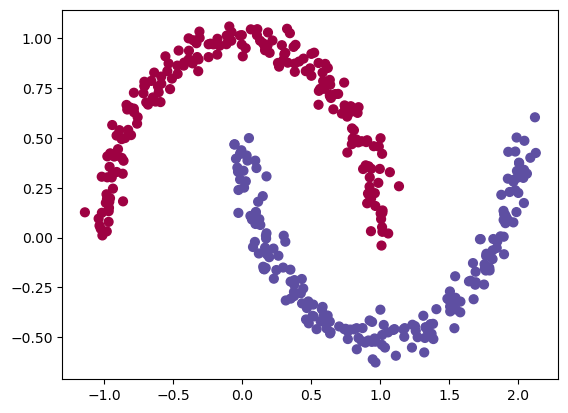

In [9]:
#Dados a serem usados
mat_x, arr_y = sklearn.datasets.make_moons(400, noise=0.05)
plt.scatter(mat_x[:,0], mat_x[:,1], s=40, c=arr_y, cmap=plt.cm.Spectral)

In [10]:
# Crie o modelo de regressão logistica para esses dados
funcao = lambda z: 1/(1+np.exp(-z))
dz_funcao = lambda a, z, y: a-y
obj_regressao_logistica = RegressaoLogistica(funcao,dz_funcao)

In [11]:
#crie o modelo usando mat_x e arr_y
obj_regressao_logistica.fit(mat_x,arr_y)


(400, 2)
MAT_X: [[ 0.55208969  0.66606323]
 [ 0.1711055   0.00936971]
 [ 1.06884868  0.32795707]
 [-0.659445    0.78564161]
 [ 0.91318663 -0.51576357]
 [-0.98032552  0.19387055]
 [ 0.6738607   0.71976948]
 [-1.04078366  0.09528504]
 [-0.60572045  0.72875699]
 [ 0.07747493 -0.04714487]
 [ 0.50893477 -0.39209368]
 [ 0.46157347 -0.41033015]
 [ 0.93188433  0.03212332]
 [ 1.01117042 -0.53744328]
 [ 1.37102284 -0.4820091 ]
 [-0.80623903  0.5139549 ]
 [ 1.22872765 -0.55116312]
 [-0.98386153  0.21713113]
 [-0.42445208  0.86244377]
 [-0.83357482  0.64232197]
 [ 0.69423067  0.72053234]
 [ 1.50524197 -0.34565588]
 [ 0.16934205 -0.1520433 ]
 [-0.01613132  0.42138018]
 [-0.87307513  0.39955328]
 [ 0.2999593   0.00949693]
 [ 0.0126495   0.25054651]
 [-0.93715253  0.24554056]
 [ 0.59082344 -0.38614097]
 [ 2.08630366  0.40039361]
 [ 0.3803277   0.83121341]
 [ 0.93399666  0.34501677]
 [-0.10065559  0.98984511]
 [-0.38838592  0.89411174]
 [ 0.17509583  0.02167195]
 [-0.04586363  0.39575238]
 [ 0.9231170

ValueError: maximum supported dimension for an ndarray is 32, found 400

In [12]:
# Apresente aqui a superfície de decisão desses dados
plot_decision_boundary(obj_regressao_logistica,mat_x,arr_y)

# Plotando a acurácia para ter uma métrica númerica direta sobre o desempenho
print(f"Acurácia: {accuracy_score(obj_regressao_logistica.predict(mat_x), arr_y)}")


(93075, 2)
MAT_X: [[-1.6302982 -0.8786837]
 [-1.6202982 -0.8786837]
 [-1.6102982 -0.8786837]
 ...
 [ 2.5897018  1.3013163]
 [ 2.5997018  1.3013163]
 [ 2.6097018  1.3013163]]
arr_w: None
b: 0


ValueError: maximum supported dimension for an ndarray is 32, found 93075

Descreva o impacto ao alterar a taxa de aprendizado e o número de épocas (`learning_rate` e `num_iteracoes`, respectivamente) algum desses parâmetros podem ocasionar overfitting/underfitting? Quando?

O learning_rate refere-se ao tamanho dos passos que o algoritmo de otimização dá na direção do mínimo local da função de perda. Uma taxa muito alta pode resultar em oscilações em torno do mínimo, enquanto uma taxa muito baixa pode fazer com que o algoritmo convirja muito lentamente ou fique preso em mínimos locais.

Já o num_iteracoes se refere ao número de vezes que o algoritmo percorre todo o conjunto de treinamento durante o processo de treinamento. Uma época completa é quando o modelo foi atualizado uma vez com cada ponto de dados. Se o número de épocas for muito baixo, o modelo pode não ter tempo suficiente para aprender os padrões nos dados de treinamento e pode acabar subajustando (underfitting) os dados. Se o número de épocas for muito alto, o modelo pode aprender os dados de treinamento muito bem, mas também pode aprender o ruído nos dados, levando ao sobreajustamento (overfitting).

